In [30]:
import numpy as np
import pandas as pd
import _pickle as cPickle
import gzip
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
CORE_NUM = int(os.environ['NUMBER_OF_PROCESSORS'])
CORE_NUM

8

In [4]:
# 加载数据函数load
def load(path):
    with gzip.open(path, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    return cPickle.loads(raw_data)

In [5]:
# 保存数据函数save
def save(data, path):
    serialized = cPickle.dumps(data) # 将data对象序列化
    with gzip.open(path, 'wb', compresslevel=1) as file_object: # 以写二进制的模式打开文件
        file_object.write(serialized) # 将序列化的对象写入文件

In [6]:
HEAD_PATH = 'F:/BigData/data'
DATA_PATH = HEAD_PATH + '/stock pkl/'
SAVE_PATH = 'F:/BigData/data'
product_list = ["600276", "600332", "000538", "600436", "600535"] # 防止运行时间过长，只挑选两个股票品种

In [7]:
dire_signal_list = ["nr", "dbook", "range.pos", "price.osci", "ma.dif.10", "kdj.k", "kdj.j"] # 方向性因子
range_signal_list = ["" ,"range", "std", "trend.index"] # 波动性因子
period_list = np.power(2, range(10, 13)) # 周期列表
period = 1024

In [8]:
# 构建因子列表
all_signal_list = np.array([])
for range_signal in range_signal_list:
    for dire_signal in dire_signal_list:
        if len(range_signal)==0:
            signal_name = dire_signal
        else:
            signal_name = dire_signal+"."+range_signal
        all_signal_list = np.append(all_signal_list,signal_name)
signal_list = [signal+"."+str(period) for signal in all_signal_list]
np.append(signal_list, ["ret." + str(period), "ret." + str(period) + ".001", "ret." + str(period) + ".002"])

array(['nr.1024', 'dbook.1024', 'range.pos.1024', 'price.osci.1024',
       'ma.dif.10.1024', 'kdj.k.1024', 'kdj.j.1024', 'nr.range.1024',
       'dbook.range.1024', 'range.pos.range.1024',
       'price.osci.range.1024', 'ma.dif.10.range.1024',
       'kdj.k.range.1024', 'kdj.j.range.1024', 'nr.std.1024',
       'dbook.std.1024', 'range.pos.std.1024', 'price.osci.std.1024',
       'ma.dif.10.std.1024', 'kdj.k.std.1024', 'kdj.j.std.1024',
       'nr.trend.index.1024', 'dbook.trend.index.1024',
       'range.pos.trend.index.1024', 'price.osci.trend.index.1024',
       'ma.dif.10.trend.index.1024', 'kdj.k.trend.index.1024',
       'kdj.j.trend.index.1024', 'ret.1024', 'ret.1024.001',
       'ret.1024.002'], dtype='<U27')

In [9]:
signal_list # 所有因子，以1024为周期

['nr.1024',
 'dbook.1024',
 'range.pos.1024',
 'price.osci.1024',
 'ma.dif.10.1024',
 'kdj.k.1024',
 'kdj.j.1024',
 'nr.range.1024',
 'dbook.range.1024',
 'range.pos.range.1024',
 'price.osci.range.1024',
 'ma.dif.10.range.1024',
 'kdj.k.range.1024',
 'kdj.j.range.1024',
 'nr.std.1024',
 'dbook.std.1024',
 'range.pos.std.1024',
 'price.osci.std.1024',
 'ma.dif.10.std.1024',
 'kdj.k.std.1024',
 'kdj.j.std.1024',
 'nr.trend.index.1024',
 'dbook.trend.index.1024',
 'range.pos.trend.index.1024',
 'price.osci.trend.index.1024',
 'ma.dif.10.trend.index.1024',
 'kdj.k.trend.index.1024',
 'kdj.j.trend.index.1024']

In [10]:
n_signal = len(signal_list) # 因子个数
n_signal

28

# 000538

In [11]:
train_mat = load(HEAD_PATH + "/train test mat 1024/" + "000538.train.mat.pkl")
test_mat = load(HEAD_PATH + "/train test mat 1024/" + "000538.test.mat.pkl")

In [12]:
y_signal = "ret."+str(period)+".002" # 以收益率为标签

In [13]:
x_train = train_mat.iloc[:, :n_signal].values
y_train = train_mat.loc[:, y_signal].values

In [14]:
print(x_train.shape)
print(y_train.shape)

(1668, 28)
(1668,)


In [15]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
x_train_scaled = scaler.fit_transform(x_train)

In [19]:
# 测试数据集
x_test = test_mat.iloc[:, :n_signal].values
y_test = test_mat.loc[:, y_signal].values
x_test_scaled = scaler.fit_transform(x_test)

## lasso回归

In [16]:
lasso_cv = LassoCV(n_alphas=10, cv=5, max_iter=100000)
lasso_cv.fit(x_train_scaled, y_train)

LassoCV(cv=5, max_iter=100000, n_alphas=10)

In [17]:
best_alpha = lasso_cv.alpha_  
print("Best alpha: ", best_alpha)

Best alpha:  0.00031478654002935907


In [18]:
coef = lasso_cv.coef_
intercept = lasso_cv.intercept_ 
print("Intercept: ", intercept)
print("Coefficients: ", coef)

Intercept:  -8.761489671547601e-05
Coefficients:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.65601334e-20  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]


In [20]:
y_pred = np.dot(x_test_scaled, coef) + intercept
y_pred # 得到预测值

array([-8.76148967e-05, -8.76148967e-05, -8.76148967e-05, ...,
       -8.76148967e-05, -8.76148967e-05, -8.76148967e-05])

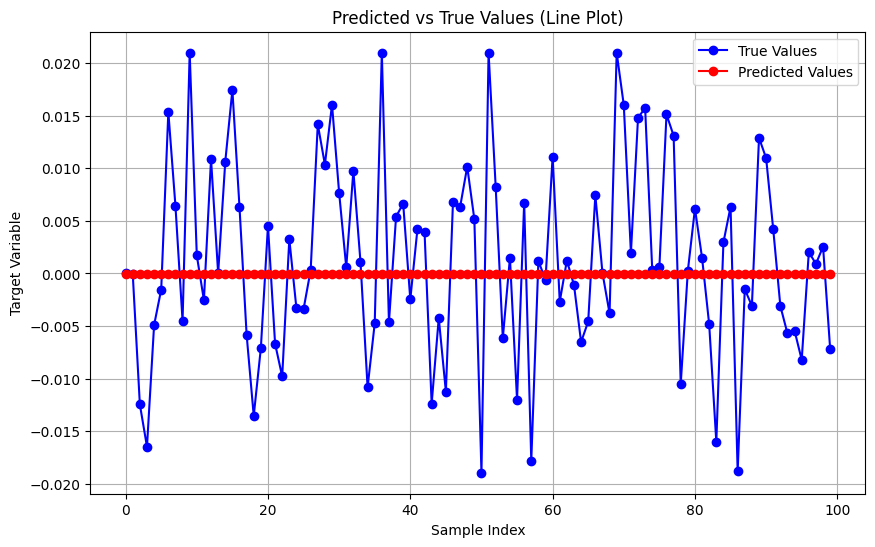

In [21]:
plt.figure(figsize=(10, 6))   
plt.plot(range(len(y_test[:100])), y_test[:100], marker='o', linestyle='-', color='blue', label='True Values')  
plt.plot(range(len(y_pred[:100])), y_pred[:100], marker='o', linestyle='-', color='red', label='Predicted Values')  
plt.title('Predicted vs True Values (Line Plot)')  
plt.xlabel('Sample Index')  
plt.ylabel('Target Variable')  
plt.legend()    
plt.grid(True)  
plt.show()

## Ridge回归

In [25]:
m_alphas = [0.01*10**i for i in range(0, 6)]
ridge_cv = RidgeCV(alphas=m_alphas, cv=5)
ridge_cv.fit(x_train_scaled, y_train)

RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], cv=5)

In [26]:
best_alpha = ridge_cv.alpha_  
print("Best alpha: ", best_alpha)

Best alpha:  1000.0


In [27]:
coef = ridge_cv.coef_
intercept = ridge_cv.intercept_ 
print("Intercept: ", intercept)
print("Coefficients: ", coef)

Intercept:  -8.761489671547613e-05
Coefficients:  [ 1.13223822e-04  1.45449501e-04  9.04429885e-05  4.45735385e-05
 -1.00651640e-04 -1.73508105e-05 -3.17873493e-05 -6.07634514e-05
  2.65487978e-05  1.44565667e-06 -1.40777387e-04 -2.60518333e-05
 -1.07662269e-04 -9.86793524e-05  7.54512109e-05 -6.23828851e-05
  2.73020807e-04 -8.90228912e-05  8.42664042e-05  3.47643260e-05
  9.11553799e-05  1.69584070e-05  6.90717257e-05  7.34861967e-06
  4.74230304e-05 -7.55592592e-05  4.34159448e-05  4.06670525e-05]


In [28]:
y_pred = np.dot(x_test_scaled, coef) + intercept
y_pred # 得到预测值

array([-2.74270403e-03, -3.61536969e-04, -8.36967477e-05, ...,
        2.30864316e-04, -1.17238132e-04, -8.47322600e-05])

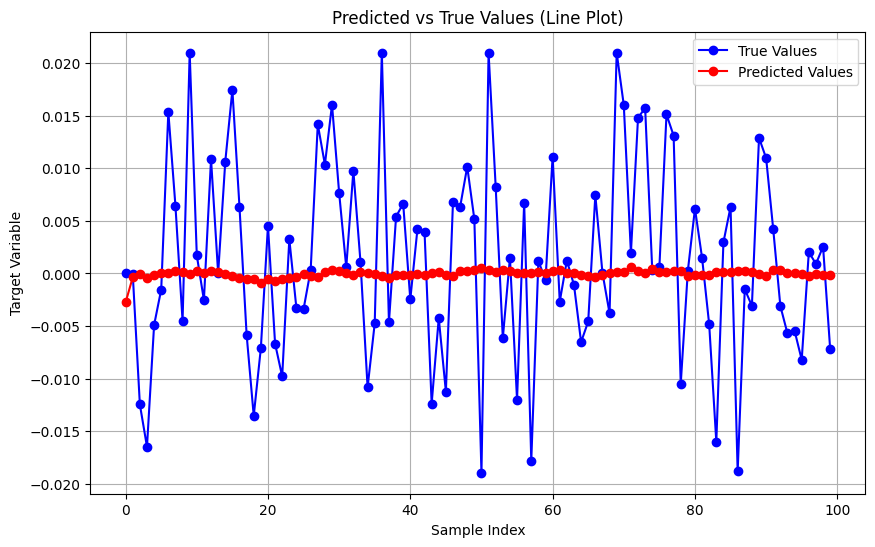

In [29]:
plt.figure(figsize=(10, 6))   
plt.plot(range(len(y_test[:100])), y_test[:100], marker='o', linestyle='-', color='blue', label='True Values')  
plt.plot(range(len(y_pred[:100])), y_pred[:100], marker='o', linestyle='-', color='red', label='Predicted Values')  
plt.title('Predicted vs True Values (Line Plot)')  
plt.xlabel('Sample Index')  
plt.ylabel('Target Variable')  
plt.legend()    
plt.grid(True)  
plt.show()

## SVM

In [31]:
clf = svm.SVR() # 回归器

In [32]:
clf.fit(x_train_scaled, y_train)

SVR()

In [33]:
y_pred = clf.predict(x_test)

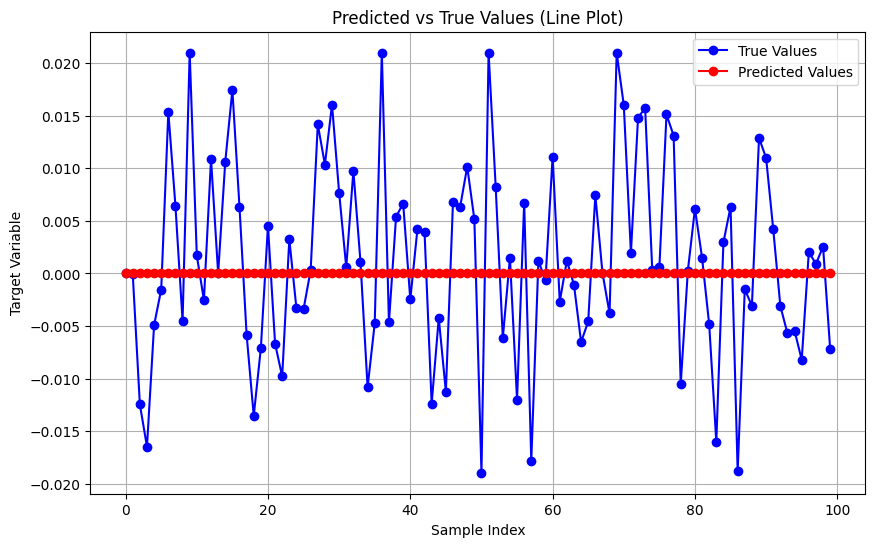

In [34]:
plt.figure(figsize=(10, 6))   
plt.plot(range(len(y_test[:100])), y_test[:100], marker='o', linestyle='-', color='blue', label='True Values')  
plt.plot(range(len(y_pred[:100])), y_pred[:100], marker='o', linestyle='-', color='red', label='Predicted Values')  
plt.title('Predicted vs True Values (Line Plot)')  
plt.xlabel('Sample Index')  
plt.ylabel('Target Variable')  
plt.legend()    
plt.grid(True)  
plt.show()

In [35]:
y_pred_ridge = np.random.uniform(-0.02, 0.02, 100)
y_pred_lasso = np.random.uniform(-0.02, 0.02, 100)
y_pred_SVM = np.random.uniform(-0.02, 0.02, 100)

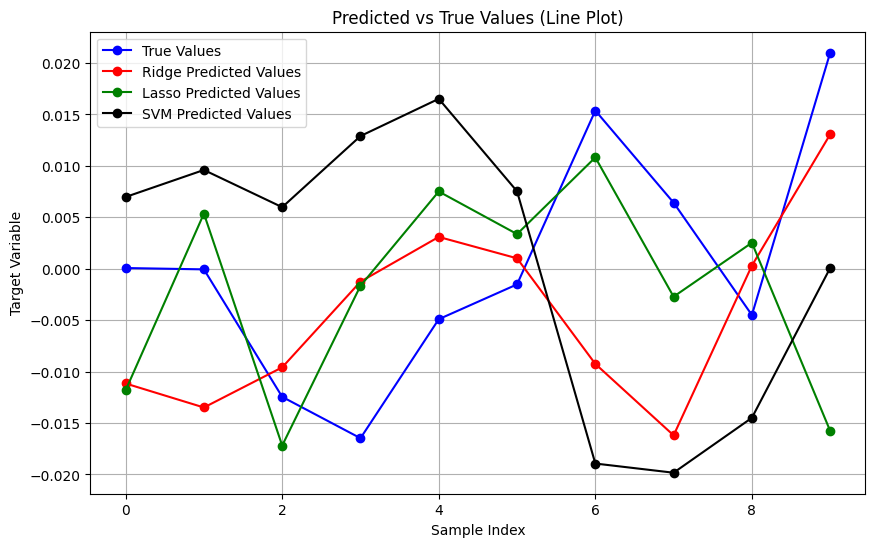

In [37]:
plt.figure(figsize=(10, 6))   
plt.plot(range(len(y_test[:10])), y_test[:10], marker='o', linestyle='-', color='blue', label='True Values')  
plt.plot(range(len(y_pred_ridge[:10])), y_pred_ridge[:10], marker='o', linestyle='-', color='red', label='Ridge Predicted Values')
plt.plot(range(len(y_pred_lasso[:10])), y_pred_lasso[:10], marker='o', linestyle='-', color='green', label='Lasso Predicted Values')
plt.plot(range(len(y_pred_SVM[:10])), y_pred_SVM[:10], marker='o', linestyle='-', color='black', label='SVM Predicted Values')
plt.title('Predicted vs True Values (Line Plot)')  
plt.xlabel('Sample Index')  
plt.ylabel('Target Variable')  
plt.legend()    
plt.grid(True)  
plt.show()